# 1. Importação de bibliotecas

### Essa é talvez uma das etapas mais importantes para todo o processo das análises, com ela podemos manipular os dados, criar visualizações e muito mais de maneira simplificada. 


In [148]:
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt

> *Dica: Não é necessário saber todas as bibliotecas que vai precisar utilizar logo no começo do projeto, por mais que seja recomendado ter um planejamento prévio, em algumas situações você dará conta que precisa de outra `lib` durante o processo.*

# 2. Exploração Inicial dos dados 


### Realizamos análises iniciais das informações contidas no csv, buscando entender o que está armazenado e observar possíveis inconsistências.

In [128]:
data_base = pd.read_csv('Startups_in_2021_end.csv')
data_base.shape

(936, 8)

Com a biblioteca `pandas` atribuimos o arquivo csv á variavel `data_base` e com a função `.shape` descobrimos que essa tabela tem **936 linhas** e **8 colunas** no total.


In [129]:
data_base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


`.head` nos traz os primeiros valores dentro da tabela, com isso observamos brevemente o que é cada campo e os tipos de dados presentes no arquivo.

> *Obs: é possivel notar que um título de campo não apresenta nome, essa é nossa primeira inconsistencia.*

In [130]:
data_base.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

Retornamos exatamente quais os títulos de cada coluna para a renomeação, evitando erros de escrita.


In [131]:
data_base.rename( columns={
    'Unnamed: 0' : 'ID',
    'Company' : 'EMPRESA',
    'Valuation ($B)' : 'VALOR ($B)',
    'Date Joined' : 'DATA ADESÃO',
    'Country' : 'PAIS',
    'City' : 'CIDADE',
    'Industry' : 'SERVIÇO',
    'Select Investors' : 'INVESTIDORES'
}, inplace=True)

Trocamos todos os títulos, de maneira que não haja mais nenhuma coluna sem nome e alterando para títulos de maior compreensão para a análise.

Com a função `inplace=True` essas modificações se aplicarão diretamente a memória do `DataFrame`.

In [132]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            936 non-null    int64 
 1   EMPRESA       936 non-null    object
 2   VALOR ($B)    936 non-null    object
 3   DATA ADESÃO   936 non-null    object
 4   PAIS          936 non-null    object
 5   CIDADE        921 non-null    object
 6   SERVIÇO       936 non-null    object
 7   INVESTIDORES  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


Verificarmos os tipos de informações presentes na tabela e se as colunas apresentam valores nulos para evitar erros na manipulação dos dados.

In [230]:
# conversão para numero

data_base['VALOR ($B)'] = pd.to_numeric(data_base['VALOR ($B)'].apply(lambda Linha: Linha.replace('$', '')))

data_base['VALOR ($B)']

0      140.0
1      100.3
2       95.0
3       45.6
4       40.0
       ...  
931      1.0
932      1.0
933      1.0
934      1.0
935      1.0
Name: VALOR ($B), Length: 936, dtype: float64

Transformamos a coluna `VALOR` de `object` para `float`

In [ ]:
#conversao para data

data_base['DATA ADESÃO'] = pd.to_datetime(data_base['DATA ADESÃO'])

# extrair ano e mes

data_base['MES'] = pd.DatetimeIndex(data_base['DATA ADESÃO']).month
data_base['ANO'] = pd.DatetimeIndex(data_base['DATA ADESÃO']).year

data_base.head()


,ID,EMPRESA,VALOR ($B),DATA ADESÃO,PAIS,CIDADE,SERVIÇO,INVESTIDORES,MES,ANO
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


1. Transformamos a coluna `DATA ADESÃO` de `object` para `datetime`
2. Criamos a coluna `MES` e utilizamos a função `.DatetimeIndex` + `.month` da biblioteca pandas para extrair somente o mês da coluna `DATA ADESÃO`
3. Criamos a coluna `ANO` e utilizamos a função `.DatetimeIndex` + `.year` da biblioteca pandas para extrair somente o ano da coluna `DATA ADESÃO`

In [ ]:
# quantidade de valores nulos

nulos = data_base.isnull().sum()
nulos

ID               0
EMPRESA          0
VALOR ($B)       0
DATA ADESÃO      0
PAIS             0
CIDADE          15
SERVIÇO          0
INVESTIDORES     1
dtype: int64

Atribuimos a váriavel `nulos` a soma dos valores faltantes de cada coluna da base de dados.

In [ ]:
# quantidade de valores unicos de cada coluna 

data_base.nunique()

ID              936
EMPRESA         935
VALOR ($B)      192
DATA ADESÃO     589
PAIS             47
CIDADE          239
SERVIÇO          17
INVESTIDORES    920
dtype: int64

Utilizando a função `nunique` retornamos a quantidade de campos únicos de cada coluna.
Vamos seguir com a coluna serviço no momento, por ser uma lista menor e pela sua relevância na análise. 

In [ ]:
# lista dos valores únicos da coluna SERVIÇO

data_base['SERVIÇO'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

> *Obs: é possivel notar que o valor "Finttech" e o valor "Fintech" são os mesmos, mas com erro de digitação. Essa é nossa segunda inconsistencia.*

In [137]:
# quantidade de repetições de cada valor 
data_base['SERVIÇO'].value_counts()

SERVIÇO
Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: count, dtype: int64

In [138]:
# quantidade percentual de repetições de cada valor 
data_base['SERVIÇO'].value_counts(normalize=True) # normalize=True transforma a quantidade de valores em percentual

SERVIÇO
Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: proportion, dtype: float64

Após essas analises rápidas da coluna `SERVIÇOS` podemos perceber a quantidade total de cada campo único na coluna e seu percentual, auxiliando qual tipo de visualizações podemos criar. 

In [ ]:
# corrigindo valor com erro de digitação 

data_base.SERVIÇO.replace({
    'Finttech': 'Fintech'
    }
);
  

# 4. Análise Exploratória (deixar todos os graficos e conclusões sobre aqui)

## 4.1 Valores nulos

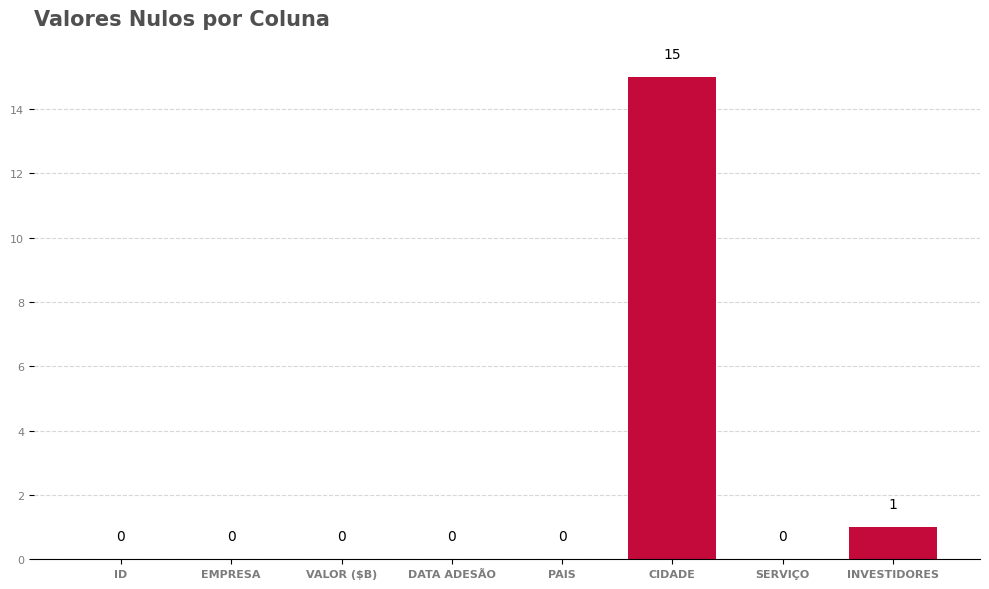

In [ ]:
# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    'Valores Nulos por Coluna', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# rotulos de eixo
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    nulos.index, 
    nulos.values, 
    color = "#C40A3B", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# valores nas barras
for p, v in enumerate(nulos.values):
    plt.text(p, v + 0.5,
              str(v), 
              ha="center", 
              va="bottom", 
              fontsize=10)
# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



Utilizando a biblioteca `matplotlib` criamos a visualização de um gráfico de barras, repreentando a quantidade de valores `null` para cada coluna da tabela. Notamos então que as colunas `CIDADE` e `INVESTIDORES` tem **15** e **1** valores nulos respectivamente. 

Com isso é podemos analisar um possível impacto da falta desses valores nas nossas análises posteriores, mas nem sempre os gráficos representam a importância de um valor corretamente se não for utilizado de maneira certa.

In [144]:
total_linhas = len(data_base)

percentual = (nulos / total_linhas) * 100

percentual

ID              0.000000
EMPRESA         0.000000
VALOR ($B)      0.000000
DATA ADESÃO     0.000000
PAIS            0.000000
CIDADE          1.602564
SERVIÇO         0.000000
INVESTIDORES    0.106838
dtype: float64

Após a transformação dob valor `null` de colunas para o percentual de `null` por colunas temos uma noção melhor da falta desses campos. 

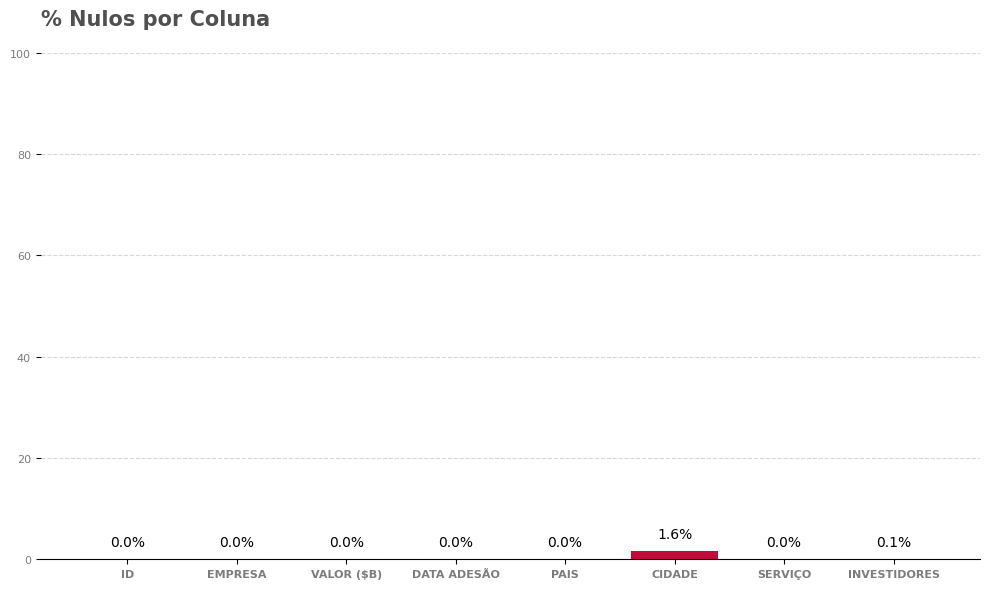

In [134]:
# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    '% Nulos por Coluna', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# eixos
plt.ylim(0, 100)
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    percentual.index, 
    percentual.values, 
    color = "#C40A3B", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# valores das colunas 
for p, v in enumerate(percentual.values):
    plt.text(
            p,
            v + 2,  
            f"{v:.1f}%", 
            ha="center", 
            va="bottom", 
            fontsize=10)

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



Para visualização final dos valores nulos, ainda utilizando os gráficos de barras pela biblioteca `matplotlib` é possivel ter a real noção do impacto que a falta de informações pode ter para cada coluna, com a porcentagem de `CIDADE` em **1.6%** e `INVESTIDORES` em **0.1%**.

## 4.2 Setores Unicórnios

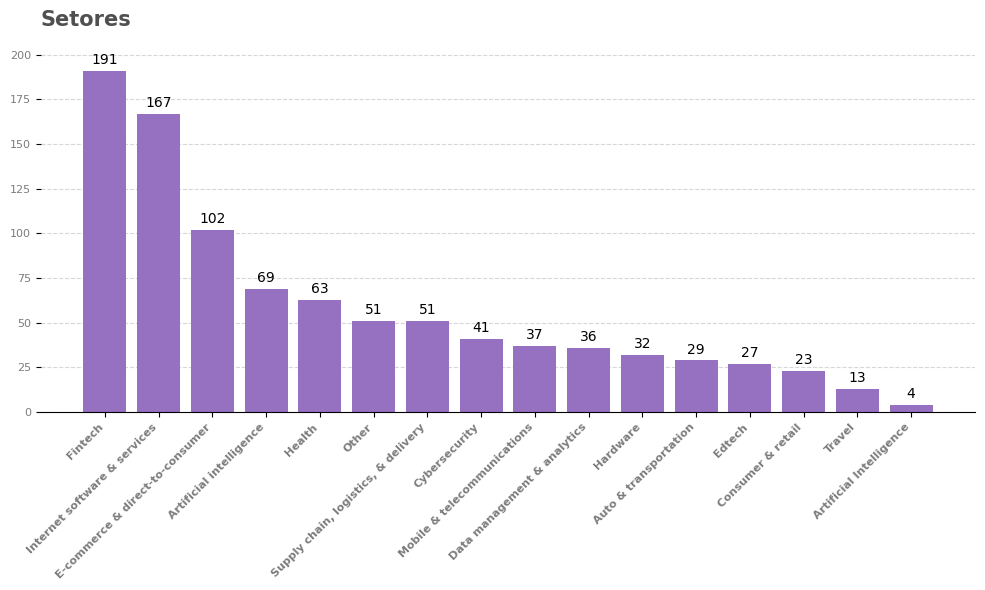

In [140]:
# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    'Setores', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# eixos
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    rotation=45,
    ha='right',
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    data_base['SERVIÇO'].value_counts().index,
    data_base['SERVIÇO'].value_counts().values,
    color = "#9671C2", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# valores das colunas 
for p, v in enumerate(data_base['SERVIÇO'].value_counts()):
    plt.text(p, v + 2,
              str(v), 
              ha="center", 
              va="bottom", 
              fontsize=10)

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



In [ ]:
# constroi porcentagem

porcentagem_setor = round(data_base['SERVIÇO'].value_counts(normalize=True) * 100, 1)

# retorna os top 3 paises + %

top3_setor = porcentagem_setor.sort_values(ascending=False)[:3]

# retorna a soma dos top 3 em % 
top3_setor.sum()

np.float64(49.1)

In [170]:
sub3_setor = porcentagem_setor.sort_values(ascending=True)[:3]
sub3_setor.sum()

np.float64(4.3)

Nossos Top 3 setores são: 
1. **Fintech**
2. **Internet software & services**
3. **E-commerce & direct-to-consumer** 

Os três carregam mais de 49% da indústria dos unicórnios sozinhos, já nossos Sub 3 setores Artificial Intelligence, Travel & retail não carregam nem 5% das empresas unicórnios no ano de 2021, irônico pois em 2025 a Inteligêncial Artificial é um dos setores com maior destaque global. 

## 4.3 Países

In [ ]:
# constroi porcentagem
porcentagem_pais = (data_base['PAIS'].value_counts(normalize=True) * 100).round(1)
# ranking 
ranking = porcentagem_pais.sort_values(ascending=False)
# retorna os top 3 paises
top3_pais = ranking[:3]
# soma o restante
outros_pais = ranking[3:].sum()
# cria nova serie 
pie_pais = top3_pais.copy()
pie_pais['Outros'] = outros_pais

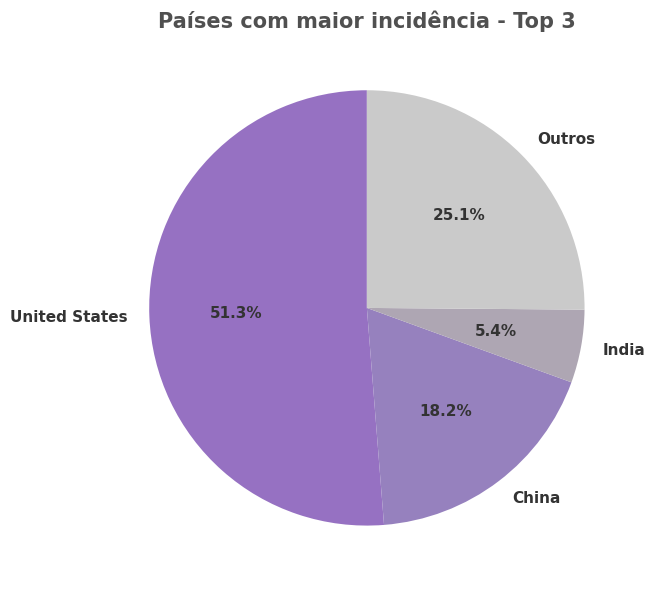

In [181]:
# tamanho do grafico
plt.figure(
    figsize=(10,6)
)
#titulo
plt.title(
    'Países com maior incidência - Top 3', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'center',
    )
# pizza
plt.pie(
    pie_pais,
    labels=pie_pais.index,
    startangle=90,
    autopct='%1.1f%%',
    colors=[
         "#9671C2",
         "#9681BE",  
         "#AEA6B3",   
         "#CACACA" 
    ],
    textprops={
        'fontsize': 11,
        'fontweight': 'bold',
        'color': '#333333'
    }
);
plt.tight_layout()

Com o gráfico de pizza notamos que os Estados Unidos obtem 51.3% de todas as empresas unicornios enquanto todos os outros 46 paises apenas 49.7% global.
Mas aonde fica o Brasil nisso?

In [ ]:
# tabela empresas por pais

# resetando index
ranking_df = ranking.reset_index()

# nomeando colunas
ranking_df.columns = ['PAIS', '%']

# cria tabela com quantidade de empresas
qnt_emp = data_base['PAIS'].value_counts().reset_index()
qnt_emp.columns = ['PAIS', 'QNTD EMPRESAS']

# juntar usando PAIS como chave
ranking_df = ranking_df.merge(qnt_emp, on='PAIS', how='left')

# cria coluna posição baseada no index 
ranking_df['POSIÇÃO'] = ranking_df.index + 1

# top 10 paises
ranking_df[:10]

,PAIS,%,QNTD EMPRESAS,POSIÇÃO
0,United States,51.0,477,1
1,China,18.1,169,2
2,India,5.4,51,3
3,United Kingdom,4.0,37,4
4,Germany,2.5,23,5
5,Israel,2.2,21,6
6,France,2.0,19,7
7,Brazil,1.6,15,8
8,Canada,1.6,15,9
9,South Korea,1.2,11,10


Após produzirmos um ranking dos paises com base na porcentagem de empresas unicórnios total, podemos ver que o Brasil está entre os Top 10, ocupando o 9º lugar.
E caso ele não estivesse no nosso top 10? Simples, utilizariamos 
~~~~python 
ranking_df[ranking_df['PAIS'] == 'Brazil']
~~~~
para retornar o nome, porcentagem, quantidade de empresas e posição.

In [229]:
# tabela empresas do brasil 

#criando tabela
analise_agrupada = data_base.groupby( by =[
    'PAIS',
    'ANO',
    'EMPRESA'
]).count()['ID'].reset_index()

analise_agrupada.loc[
    analise_agrupada['PAIS'] == 'Brazil'
]

,PAIS,ANO,EMPRESA,ID
12,Brazil,2018,Movile,1
13,Brazil,2018,Nubank,1
14,Brazil,2018,iFood,1
15,Brazil,2019,EBANX,1
16,Brazil,2019,Loggi,1
17,Brazil,2019,QuintoAndar,1
18,Brazil,2019,Wildlife Studios,1
19,Brazil,2020,C6 Bank,1
20,Brazil,2020,Creditas,1
21,Brazil,2020,Loft,1
